# Passive Membrane Tutorial

This is a tutorial which is designed to allow users to explore the passive responses of neuron membrane potentials and how it changes under various conditions such as current injection, ion concentration (both inside and outside the cell), change in membrane capacitance and passive conductances.

Written by Varun Saravanan; February 2018

All units are in SI units.


## Parameters:

In [1]:
dt = 1e-4      #Integration time step. Reduce if you encounter NaN errors.
t_sim = 0.5    #Total time plotted. Increase as desired.

Na_in = 13     #Sodium ion concentration inside the cell. Default = 13 (in mM)
Na_out = 120   #Sodium ion concentration outside the cell. Default = 120 (in mM)
K_in = 140     #Potassium ion concentration inside the cell. Default = 140 (in mM)
K_out = 8      #Potassium ion concentration outside the cell. Default = 8 (in mM)

Cm = 1e-7      #Membrane capacitance. Default = 0.1 microF.
gNa = 5e-7     #Passive sodium conductance. Default = 0.5 microS.
gK = 1e-5      #Passive potassium conductance. Default = 10 microS.


Nernst Potential Equations:

In [3]:
import math as ma
Ena = -0.058*ma.log10(Na_in/Na_out);
Ek = -0.058*ma.log10(K_in/K_out);

#If you wish to use pre-determined ENa and EK values, set them here and convert this cell into code from Markdown:
Ena = ??;
Ek = ??;

In [4]:
import numpy as np
niter = int(t_sim//dt)    #Total number of integration steps (constant).
#Output variables:
Vm = np.zeros(niter)
Ie = np.zeros(niter)

In [6]:
#Starting values: You can change the initial conditions of each simulation here:
Vm[0] = -0.070;

## Current Injection

In [7]:
I_inj =-5e-8   #Current amplitude. Default = 50 nA.
t_start = 0.150  #Start time of current injection.
t_end = 0.350    #End time of current injection.

Ie[int(t_start//dt):int(t_end//dt)] = I_inj

### Calculation - do the actual computation here:

In [8]:
#Integration steps - do not change:
for i in np.arange(niter-1):    
    Vm[i+1] = Vm[i] + dt/Cm*(Ie[i] - gNa*(Vm[i] - Ena) - gK*(Vm[i] - Ek));
    


## Plot results

<IPython.core.display.Javascript object>


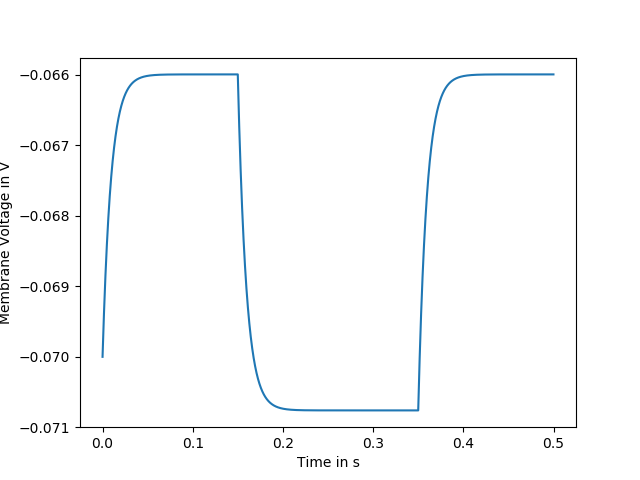

In [9]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.figure()
t = np.arange(niter)*dt;
plt.plot(t,Vm);
plt.xlabel('Time in s')
plt.ylabel('Membrane Voltage in V')